# CSIT5210 Assignment

## Spring 2019

### Instructor: Dr. Kenneth Leung (kwtleung@cse.ust.hk)

### TA: Dr. Kevin Wang (kevinw@ust.hk)


---

## [Group Signup link](https://docs.google.com/spreadsheets/d/1k523REcIAs6uo5rT0nISXjgk8R58ARvzjWE48pKQC_k/edit#gid=0)

## Description

In this assignment, you will have an opportunity to apply some data mining techniques that you learned in the class to a problem.

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.

You are required to form a team with at most 3 students. You and your groupmates should evenly divide the project tasks yourself. All team members are going to graded with the same score.

There are two parts in this assignment. Part 1 is a programming exercise that your groups are required to complete certain tasks using Python. You should complete your Part 1 in this jupyter notebook (.ipynb file) directly. Part 2 is a group presentation that you need to present your findings on the Task 5 of Part 1.

## Submission

| Part | Due Date | Submission by | Files to Submit |
|---|-----|------|----|
| Part 1 | 1/5/2019 (Wed) 23:59 | [email to TA](mailto:kevinw@ust.hk) | this `ipynb` file. |
| Part 2 | 7/5/2019 (Thu) during lecture | Printed hardcopy | Presentation slides (4 slides per page) |

## Prerequesite

You are recommended to install the following packages

* pandas
* geohash
* matplotlib
* sklearn

To install these packages, you shall type in your terminal

```
> pip install pandas
> pip install geohash
> pip install matplotlib
> pip install sklearn
```

The package geohash is a little tricky to install.

## About the data and the context

We are working on some data related to shared bike. There are two sets of data provided: 
* Mobike (China based data) - For Part 1 Task 1 to Task 4
* bike share (US based data) - For Part 1 Task 5 

## Download Area

You can [download the data here](https://home.cse.ust.hk/~kevinw/CSIT5210/data.zip)

There are some API and reference codes that might be useful for your assignment. [download code here](https://home.cse.ust.hk/~kevinw/CSIT5210/code.zip)

### Mobike

The data acquired from Mobike looks like the following. Apparently `orderid` is an unique ID refers to the transaction ID, `userid` refers to the registered user and `bikeid` refers to the ID of the bike. `biketype` refers to the type of the bike can be either 1 or 2. `starttime` refers to the starts of the loan. The starting location and ending location are GPS coordinates compressed in geohashed. We will let you know how to convert that back to x,y coordinates later.


In [1]:
# import pandas as pd
# mobikedata = pd.read_csv('../data/mobikeData.csv', sep=',', nrows= 10, index_col= ['orderid'])
# mobikedata.head(10)

### bikeshare

The data acquired from bikeshare looks like the following. `trip_id` refers to the unique ID of a transaction. Bike rented in this system has fixed parking stations and `from_station_id` and `to_station_id` are simply referring the starting and ending location of the loan. 

There are two types of customers: **Customer** and **Subscriber**. A **Subscriber** will register with the company with more details while a **Customer** is an ad-hoc customer that does not register.

In [2]:
# divvybike = pd.read_csv('../data/bikeshareTraining.csv', sep=',', nrows = 10, index_col=['trip_id'])
# divvybike.head(10)

## Part 1 - Programming Task

Your team are required to complete the following tasks on this Jupyter notebook. 

1. Data Preprocessing & Statistics - with Mobike Data
2. Data Clustering - with Mobike Data
3. Simple Data Visualization - with Mobike Data
4. Frequent Pattern Mining - with Mobike Data
5. Prediction - with bikeshare Data


In [3]:
# Task 1 - Data Preprocessing and Statistics
#
#
# Task 1.1 Read Mobike Data in using the API Pandas.read_csv so that the column 'starttime' is read as datetime64.
#                 Hint: use the parameter parse_dates
#                  ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#                 To make sure your code works you might want to read only the first 1000 rows and expand it later

import pandas as pd
import geo
import math as math

mobikedata = pd.read_csv('data/mobikeData.csv',parse_dates=['starttime'], date_parser=lambda col: pd.to_datetime(col, utc=True))



In [4]:
# Task 1.2 Convert the field geohashed_start_loc and geohashed_end_loc into x-y coordinate using the API Geohash.decode
#                  The package Geohash can be found from pip. You might encounter the problem 
#                   'python3.5.2 can't find the module '  ref: https://github.com/vinsci/geohash/issues/4
#                    This can be fixed very easily. Or
#                   You might directly use the fixed version of Geohash in our project package.

mobikedata['geohashed_start_loc'] = mobikedata['geohashed_start_loc'].map(lambda loc:list(geo.decode_exactly(loc))).map(lambda x:[x[0],x[1]])
mobikedata['geohashed_end_loc'] = mobikedata['geohashed_end_loc'].map(lambda loc:list(geo.decode_exactly(loc))).map(lambda x:[x[0],x[1]])

mobikedata.head(10)


,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
0,1893973,451147,210617,2,2017-05-14 22:16:50+00:00,"[40.10353088378906, 116.28959655761719]","[40.10078430175781, 116.28684997558594]"
1,4657992,1061133,465394,1,2017-05-14 22:16:52+00:00,"[39.79042053222656, 116.32530212402344]","[39.79728698730469, 116.32255554199219]"
2,2965085,549189,310572,1,2017-05-14 22:16:51+00:00,"[39.88243103027344, 116.54228210449219]","[39.87556457519531, 116.55189514160156]"
3,4548579,489720,456688,1,2017-05-14 22:16:51+00:00,"[39.76570129394531, 116.16325378417969]","[39.76570129394531, 116.16188049316406]"
4,3936364,467449,403224,1,2017-05-14 22:16:50+00:00,"[39.96345520019531, 116.38847351074219]","[39.95933532714844, 116.38160705566406]"
5,5163705,917620,509044,1,2017-05-14 22:16:53+00:00,"[39.99366760253906, 116.47087097167969]","[39.98817443847656, 116.46400451660156]"
6,19818,583391,3190,1,2017-05-14 22:16:54+00:00,"[39.75059509277344, 116.56013488769531]","[39.74510192871094, 116.56288146972656]"
7,495333,185893,67441,1,2017-05-14 22:16:53+00:00,"[39.96620178222656, 116.27723693847656]","[39.96482849121094, 116.27449035644531]"
8,2803108,15906,295614,2,2017-05-14 22:16:55+00:00,"[39.84535217285156, 116.39122009277344]","[39.84260559082031, 116.39671325683594]"
9,271970,183740,38335,1,2017-05-14 22:16:54+00:00,"[39.89067077636719, 116.32667541503906]","[39.88105773925781, 116.33216857910156]"


In [5]:
# Task 1.3 Create the column 'distance' based on the Euclidean distance  that the order has traveled.

def dist(end, start):
    return math.sqrt((end[0]-start[0])*(end[0]-start[0]) + (end[1]-start[1])*(end[1]-start[1]))

mobikedata['distance'] = mobikedata.apply(lambda row: dist(row['geohashed_end_loc'], row['geohashed_start_loc']), axis=1)

# print(mobikedata['distance'])

In [6]:
#  Task 1.4.1  Check the memory you have spent by the API .info()

mobikedata.info()

#  Task 1.4.2  Compress the field orderid userid bikeid using a smaller data type int32 and the field biketype using int8

mobikedata['orderid'] = mobikedata['orderid'].astype('int32')
mobikedata['userid'] = mobikedata['userid'].astype('int32')
mobikedata['bikeid'] = mobikedata['bikeid'].astype('int32')
mobikedata['biketype'] = mobikedata['biketype'].astype('int8')

# Task 1.343 Check the memory you have spent again

mobikedata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214096 entries, 0 to 3214095
Data columns (total 8 columns):
orderid                int64
userid                 int64
bikeid                 int64
biketype               int64
starttime              datetime64[ns, UTC]
geohashed_start_loc    object
geohashed_end_loc      object
distance               float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(2)
memory usage: 196.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214096 entries, 0 to 3214095
Data columns (total 8 columns):
orderid                int32
userid                 int32
bikeid                 int32
biketype               int8
starttime              datetime64[ns, UTC]
geohashed_start_loc    object
geohashed_end_loc      object
distance               float64
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), int8(1), object(2)
memory usage: 137.9+ MB


In [7]:
# Task 1.4.4 Fetch the first 10 lines of your data to preview it.

mobikedata.head(10)


,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,distance
0,1893973,451147,210617,2,2017-05-14 22:16:50+00:00,"[40.10353088378906, 116.28959655761719]","[40.10078430175781, 116.28684997558594]",0.003884
1,4657992,1061133,465394,1,2017-05-14 22:16:52+00:00,"[39.79042053222656, 116.32530212402344]","[39.79728698730469, 116.32255554199219]",0.007395
2,2965085,549189,310572,1,2017-05-14 22:16:51+00:00,"[39.88243103027344, 116.54228210449219]","[39.87556457519531, 116.55189514160156]",0.011813
3,4548579,489720,456688,1,2017-05-14 22:16:51+00:00,"[39.76570129394531, 116.16325378417969]","[39.76570129394531, 116.16188049316406]",0.001373
4,3936364,467449,403224,1,2017-05-14 22:16:50+00:00,"[39.96345520019531, 116.38847351074219]","[39.95933532714844, 116.38160705566406]",0.008008
5,5163705,917620,509044,1,2017-05-14 22:16:53+00:00,"[39.99366760253906, 116.47087097167969]","[39.98817443847656, 116.46400451660156]",0.008793
6,19818,583391,3190,1,2017-05-14 22:16:54+00:00,"[39.75059509277344, 116.56013488769531]","[39.74510192871094, 116.56288146972656]",0.006142
7,495333,185893,67441,1,2017-05-14 22:16:53+00:00,"[39.96620178222656, 116.27723693847656]","[39.96482849121094, 116.27449035644531]",0.003071
8,2803108,15906,295614,2,2017-05-14 22:16:55+00:00,"[39.84535217285156, 116.39122009277344]","[39.84260559082031, 116.39671325683594]",0.006142
9,271970,183740,38335,1,2017-05-14 22:16:54+00:00,"[39.89067077636719, 116.32667541503906]","[39.88105773925781, 116.33216857910156]",0.011072


In [8]:
# Task 1.5  Display the count, mean, standard derviation of the int type variable and 
#                  display the earliest and latest starttime.

count = mobikedata['biketype'].count()
print('count is: ', count)
mean = mobikedata['biketype'].sum() / count
print('mean is: ', mean)

sd = 0.0
for i in range(count):
    sd = sd + (mobikedata['biketype'][i] - mean) * (mobikedata['biketype'][i] - mean)
sd = math.sqrt(sd/count)
print('standard derviation is: ', sd)

print('earliest starttime is: ', mobikedata['starttime'].min())
print('latest starttime is: ', mobikedata['starttime'].max())

count is:  3214096
mean is:  1.3945075069319648
standard derviation is:  0.4887446510108368
earliest starttime is:  2017-05-10 00:00:09+00:00
latest starttime is:  2017-05-24 19:00:16+00:00


In [9]:
# Task 1.6 Find the number of order between (8am to 9am)   and the order between (1am to 2am)
#                 Note: Instead of using only the first 1000 rows, expand your selection of rows to collect enough data.
#                Hint: try the API between_time of DataFrame. 
#           ref:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html#pandas.DataFrame.between_time

ts = mobikedata.set_index(['starttime'])['orderid']
print(ts.between_time('8:00', '9:00').count())
print(ts.between_time('1:00', '2:00').count())
# print(mobikedata[(mobikedata['starttime'].dt.hour >= 8) & (mobikedata['starttime'].dt.hour <= 9)][['orderid', 'starttime']].count())
# print(mobikedata[(mobikedata['starttime'].dt.hour >= 1) & (mobikedata['starttime'].dt.hour <= 2)][['orderid', 'starttime']].count())


285125
6216


In [10]:
# Task 2 - Data Clustering 
#
#
# Task 2.1 Playing with the bikeshare data, create a DataFrame that contains two columns. 
#                 The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of order between in the interval. For example, 0:00 should contains all order happens on or after 0:00 to 0:15.
#  This task is less straight forward, at least in our solution. So let's break down a little bit.
#  Task 2.1.1 Create a list of string containing the series '0:00', '0:15', '0:30', ... '23:45' 
#                     Hint: A double loop with if-else can do the job.

time = []
for i in range(24):
    for j in range(4):
        mi = j * 15
        ms = str(mi)
        if mi == 0:
            ms = '00'
        s = str(i) + ':' + ms
        time.append(s)
        
# print(time)

# time_count = pd.DataFrame(index=time)
# time_count

In [11]:
# Task 2.1.2 Count the number of orders. You might use between_time again.
count = []
for i in range(96):
    if i != 95:
        count.append(ts.between_time(time[i], time[i+1], include_end=False).count())
    else:
        count.append(ts.between_time(time[i], time[0], include_end=False).count())

time_count = pd.DataFrame(count, index=time, columns=['volume_of_order'])
print(time_count)



       volume_of_order
0:00              4605
0:15              3693
0:30              2787
0:45              2221
1:00              1959
1:15              1667
1:30              1399
1:45              1191
2:00              1144
2:15               915
2:30               869
2:45               786
3:00               797
3:15               730
3:30               650
3:45               712
4:00               881
4:15               805
4:30              1071
4:45              1640
5:00              3013
5:15              7160
5:30              7754
5:45             11155
6:00             16448
6:15             23444
6:30             33832
6:45             47987
7:00             64733
7:15             78521
...                ...
16:30            46511
16:45            57125
17:00            70741
17:15            54267
17:30            75774
17:45            72458
18:00            78197
18:15            69489
18:30            72261
18:45            70347
19:00            61071
19:15      

In [12]:
# Task 2.2.1  Use K-mean algorithm to find 300 cluster centers of the coordinates obtained from  Task 1.2
#                  You may implement your own K-mean algorithm or simply adopt the API sklearn.cluster.KMeans
#                   ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
import numpy as np

array = mobikedata['geohashed_start_loc'].to_list() + mobikedata['geohashed_end_loc'].to_list()
# remove the duplicate coordinates.
array = list(set([tuple(t) for t in array]))

kmeans = KMeans(n_clusters=300, random_state=0).fit(array)
labels = kmeans.labels_
print(labels)
centers = kmeans.cluster_centers_
print(centers)


[223 241  36 ...  92  84 139]
[[ 39.94316785 116.37005006]
 [ 30.57423592 114.27864075]
 [ 23.12888554 113.25750078]
 [ 31.07745084 121.33756464]
 [ 31.07437134 104.34551239]
 [ 39.76745216 116.57647736]
 [ 24.48528835 118.13902719]
 [ 25.06848335 102.70877838]
 [ 34.23414751 108.91989274]
 [ 39.76744186 116.10335594]
 [ 40.10393834 116.65803343]
 [ 34.79066031 113.66141183]
 [ 40.16112868 116.25627414]
 [ 32.04400063 118.79490852]
 [ 39.79471549 116.33331826]
 [ 39.0900135  117.23413467]
 [ 28.17209441 112.99365077]
 [ 39.99255209 116.46493753]
 [ 22.80807495 108.36662292]
 [ 38.02630984 114.49754649]
 [ 39.9352009  116.1958155 ]
 [ 39.72455517 116.42234618]
 [ 37.49702454 122.1219635 ]
 [ 22.56390381 113.8944397 ]
 [ 39.94879055 116.7392346 ]
 [ 26.05584281 119.30009569]
 [ 39.94404503 116.57046691]
 [ 36.6602864  116.96961796]
 [ 39.80015841 116.48033224]
 [ 40.04597698 116.4073035 ]
 [ 38.46450806 106.28379822]
 [ 30.56579032 104.00798705]
 [ 40.22772034 116.79985657]
 [ 31.8499796

In [13]:
# Task 2.2.2 Describe how many % of order has started from a cluster centers and ends at the same cluster centers. 
match = dict()
index = 0
for i in array:
    match[i] = labels[index]
    index += 1

count = 0
start_list = mobikedata['geohashed_start_loc'].to_list()
end_list = mobikedata['geohashed_end_loc'].to_list()

index = 0
for index in range(mobikedata['geohashed_start_loc'].count()):
    if match[tuple(start_list[index])] == match[tuple(end_list[index])]:
        count += 1
        
print(count)
print(float(count) / mobikedata['geohashed_start_loc'].count())


2466903
0.7675262344373037


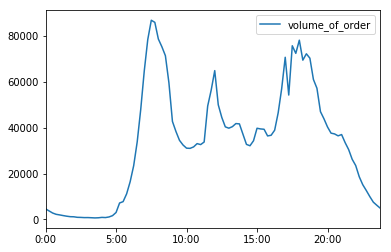

In [20]:
# Task 3 - Simple Data Visualization 
#
#
# Task 3.1 Using data obtained from Task 1.6. Plot a curveof the volume of order in different times of a day.
#                    Hint: try the API DataFrame.plot
from matplotlib import pyplot as plt 
time_count.plot.line()
plt.show()



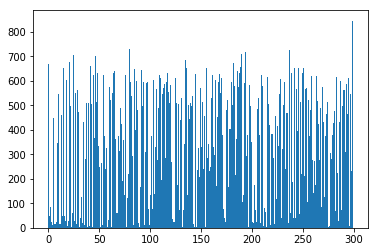

In [21]:
# Task 3.2 Using data obtained from Task 2.2.1. Plot a histogram of the volume of order in different cluster centers

plt.hist(labels, bins=list(range(300)))
plt.show()


In [22]:
# Task 4 - Frequent Pattern Mining 
#
#
# Task 4.1 Apply FPGrowth algorithm, either using existing API or write your own, to identify which set of users are likely to go-together. 
#                 Definition of go-together: they starts at the same cluster centers and their start time is in the same 15-minutes timeslot.
 #                This task may not be straight forward as you may need to build the list of transaction first.
    
# build the list of transaction for fpgrowth

transactions = []

date_list = mobikedata['starttime'].dt.date.drop_duplicates()

# mobikedata_bydate = mobikedata[mobikedata['starttime'].dt.date == date_list[0]].set_index(['starttime'])[['userid', 'geohashed_start_loc']]
# mobikedata_bydate.rename(columns={'geohashed_start_loc':'label'}, inplace=True)
# mobikedata_bydate['label'] = mobikedata_bydate['label'].map(lambda x: match[tuple(x)])
# mobikedata_bydate

# id_list = mobikedata_bydate[mobikedata_bydate['label'] == 213]['userid'].tolist()
# id_list = [str(x) for x in id_list]
# print(id_list)


for date in date_list:
  mobikedata_bydate = mobikedata[mobikedata['starttime'].dt.date == date].set_index(['starttime'])[['userid', 'geohashed_start_loc']]
  mobikedata_bydate.rename(columns={'geohashed_start_loc':'label'}, inplace=True)
  mobikedata_bydate['label'] = mobikedata_bydate['label'].map(lambda x: match[tuple(x)])
  for i in range(96):
    if i != 95:
      mobikedata_bytime = mobikedata_bydate.between_time(time[i], time[i+1], include_end=False)
    else:
      mobikedata_bytime = mobikedata_bydate.between_time(time[i], time[0], include_end=False)
    for label in range(len(centers)):
      id_list = mobikedata_bytime[mobikedata_bytime['label'] == label]['userid'].tolist()
      if len(id_list) != 0:
        id_list = [str(x) for x in id_list]
        transactions.append(id_list)    


In [23]:
print(transactions[0])

['3085', '379000', '1005887', '832803', '587620', '57145', '203730', '696862']


In [27]:
# FPGrowth algorithm

import itertools

# the structure of FP Node
class FPNode:
    def __init__(self, id, count, parent):
        self.id = id
        self.count = count
        self.parent = parent
        self.nextSameItem = None
        self.children = []


# the structure of FP Tree
class FPTree:

    def __init__(self, data_set, minsup, root_id, root_frequency):
        self.root, self.head_table, self.item_frequency = self.construct(data_set, minsup, root_id, root_frequency)


    # the tree has just a single path
    def has_single_path(self, node):
        num_children = len(node.children)
        if num_children > 1:
            return False
        if num_children == 0:
            return True
        return True and self.has_single_path(node.children[0])


    # Procedure FP-growth
    def mine_patterns(self, minsup):
        if self.has_single_path(self.root):
            return self.generate_patterns()
        else:
            return self.recursively_generate_patterns(self.conditional_mining(minsup))


    def generate_patterns(self):
        patterns = {}

        if self.item_frequency is None:
            if self.root.id is not None:
                pattern_tuple = tuple([self.root.id])
                patterns[pattern_tuple] = self.root.count
            return patterns

        items = self.item_frequency.keys()

        # if this is a conditional tree
        if self.root.id is None:
            pattern_tuple = []
        else:
            pattern_tuple = [self.root.id]
            patterns[tuple(pattern_tuple)] = self.root.count

        for i in range(1, len(items) + 1):
            for subset in itertools.combinations(items, i):
              count = min([self.item_frequency[x] for x in subset])
              pattern = tuple(sorted(list(subset) + pattern_tuple))
              patterns[pattern] = count

        return patterns


    def recursively_generate_patterns(self, patterns):
        pattern_tuple = self.root.id

        if pattern_tuple is not None:
            # We are in a conditional tree.
            new_patterns = {}
            for key in patterns.keys():
                new_patterns[tuple(sorted(list(key) + [pattern_tuple]))] = patterns[key]

            return new_patterns

        return patterns



    # Deduce the ordered frequent items.
    # For items with the same frequency, the order is given by the alphabetical order reversely.
    def preprocess(self, data_set, minsup):
        # Scan the data, and filter out items that are not frequent, also remove the duplicates.
        item_frequency = {}
        for i in range(len(data_set)):
            # remove duplicates
            data_set[i] = list(set(data_set[i]))
            for id in data_set[i]:
                item_frequency[id] = item_frequency.get(id, 0) + 1

        # filter the dictionary
        item_frequency = {k: v for k, v in item_frequency.items() if v >= minsup}

        if (len(item_frequency) == 0):
            return None, None

        # Scan the data again, filter and sort the items
        new_data_set = []
        for id_list in data_set:
            temp = []
            for id in id_list:
                if id in item_frequency.keys():
                    temp.append(id)
            temp.sort(key=lambda x: (-item_frequency[x], x))
            new_data_set.append(temp)

        return item_frequency, new_data_set


    # Construct the FP-tree from the above data
    def construct(self, data_set, minsup, root_id, root_frequency):
        item_frequency, new_data_set = self.preprocess(data_set, minsup)
        root = FPNode(root_id, root_frequency, None)
        if item_frequency is None or new_data_set is None:
            return root, None, None
        frequent_items = list(item_frequency.keys())
        frequent_items.sort(key=lambda x: (-item_frequency[x], x))
        head_table = {k: None for k in frequent_items}
        for id_list in new_data_set:
            temp = root
            for id in id_list:
                exists = False
                # if id is existed in temp.children, then let the count of this node plus 1
                for node in temp.children:
                    if node.id == id:
                        node.count += 1
                        exists = True
                        temp = node
                        break
                # else if id is not existed in temp.children, then create a new node
                if exists == False:
                    node = FPNode(id, 1, temp)
                    temp.children.append(node)
                    temp = node

                listnode = head_table[id]
                if listnode is None:
                    head_table[id] = temp
                else:
                    exists = False
                    while listnode.nextSameItem is not None:
                        if listnode is temp:
                            exists = True
                            break
                        listnode = listnode.nextSameItem
                    if exists == False:
                        if not listnode is temp:
                            listnode.nextSameItem = temp

        return root, head_table, item_frequency


    # From the FP-tree above, construct the FP-conditional tree for each item (or itemset).
    def conditional_mining(self, minsup):
        # Traverse items in head_node_link, then find the conditional prefix path, construct the FPtree, and recursively.
        if (len(self.head_table) == 0):
            return

        patterns = {}

        frequent_items = list(self.item_frequency.keys())
        frequent_items.sort(key=lambda x: (-self.item_frequency[x], x), reverse=True)

        for item in frequent_items:
            # construct FP-conditional tree for item
            path_list = self.get_conditional_data(item)

            subtree = FPTree(path_list, minsup, item, self.item_frequency[item])
            subtree_patterns = subtree.mine_patterns(minsup)

            # Insert subtree patterns into main patterns dictionary.
            for p in subtree_patterns.keys():
                if p in patterns:
                    patterns[p] += subtree_patterns[p]
                else:
                    patterns[p] = subtree_patterns[p]

        return patterns

    def get_conditional_data(self, item):
        path_list = []
        node = self.head_table[item]
        while node is not None:
            path = self.get_path(node)
            for i in range(node.count):
                path_list.append(path)
            node = node.nextSameItem

        return path_list

    def get_path(self, node):
        path = []
        temp = node.parent
        # while temp != root
        while temp is not None and temp.id is not None:
            path.append(temp.id)
            temp = temp.parent
        path.reverse()
        return path



def get_patterns(data_set, minsup):

    tree = FPTree(data_set, minsup, None, 0)
    return tree.mine_patterns(minsup)

In [ ]:
# Use our FPGrowth algorithm to identify which set of users are likely to go-together.
# We set the threshold as 6.
patterns = get_patterns(transactions, 6)

for key in patterns.keys():
  if len(key) >= 2:
    print(key, ':', patterns[key])

In [ ]:
# Use API to identify which set of users are likely to go-together.
# We set the threshold as 6.

import pyfp as pyfpgrowth
patterns = pyfpgrowth.find_frequent_patterns(transactions, 20)
for key in patterns.keys():
  if len(key) >= 2:
    print(key, ':', patterns[key])


### Task 5 - Prediction - use bikeshare data

You are given a set of training data and 1000 rows of testing data obtained from the same city. The testing data will be 1 days to 7 days after the end of the training data. The fields `to_station_name` and `to_station_id` will be masked with the number -1 in the testing data. Your job is to predict the field `to_station_id`. 

Write a function that takes two input filenames (the training data and the testing data csv) and output a DataFrame that predict the `to_station_id`. Please note that:
* Your function may only predict 1 value for `to_station_id`; 
* The accurarcy function is defined as `total_numbers_of_match` / `total_number_of_prediction`. 
* An empty prediction would be counted as one wrong prediction.
* You are allowed to use any external data (e.g. weather, map, etc..) for your prediciton. However, this set of data are taken from bikeshare and you are not allowed to lookup the data from the internet.
* **A higher accuracy does not immediate imply a higher mark for the project. We value more on how you choose your algorithm and how you fine tune your parameters.**



We provide you a reference code (`knn3.py`) written by some Chinese programmer/data scientist that work on the Mobike data. 


In [ ]:
# Task 5 Code goes here

# Preprocess the training data

import pandas as pd

training_data = pd.read_csv('data/bikeshareTraining.csv', parse_dates=['start_time'], date_parser=lambda col: pd.to_datetime(col))
training_data = training_data.drop(training_data.columns[0], axis=1)

# delete the useless data
training_data.drop(['end_time', 'bikeid', 'from_station_name', 'to_station_name'],axis = 1,inplace = True)

# Change the types of data.
from math import isnan
training_data['usertype'] = training_data['usertype'].map(lambda x: -1 if x == 'Customer' else 1)
training_data['gender'] = training_data['gender'].map(lambda x: 1 if x == 'Male' else (-1 if x == 'Female' else 0))
training_data['birthyear'] = training_data['birthyear'].map(lambda x: int((2018 - x - 1) / 5) if isnan(x)is not True else 0)
training_data['age'] = training_data['birthyear'].map(lambda x: x if x >= 0 and x <= 15 else 16)
training_data['month'] = training_data['start_time'].dt.month
training_data['weekday'] = training_data['start_time'].dt.dayofweek+1
training_data['start_time'] = training_data['start_time'].dt.hour
training_data['tripduration'] = training_data['tripduration'].map(lambda x: int(float(x.strip().replace(',', '')) / 60))
training_data.drop(['birthyear'],axis = 1,inplace = True)

# Change the station id to be continuous.
station_list = training_data['from_station_id'].drop_duplicates().sort_values().tolist() + training_data['to_station_id'].drop_duplicates().sort_values().tolist()
station_list = list(set(station_list))
station_map = {}
map_index = 0
for station in station_list:
  station_map[station_list[map_index]] = map_index+1
  map_index += 1

training_data['from_station_id'] = training_data['from_station_id'].map(lambda x: station_map[x])
training_data['to_station_id'] = training_data['to_station_id'].map(lambda x: station_map[x])


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import math

##data process

data=training_data
x_columns=[]
for i in data.columns:
    if i not in ['id','to_station_id']:
        x_columns.append(i)
x_columns.append('from_station_id')
x_columns.append('from_station_id')
x_columns.append('from_station_id')
x_columns.append('start_time')
x_columns.append('start_time')
x_columns.append('usertype')
x=data[x_columns]
y=data['to_station_id']

X_train,X_test,Y_train,Y_test=train_test_split(x,y)
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

##knn model
estimator=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='kd_tree')
estimator.fit(X_train,Y_train)

y_predicted=estimator.predict(X_test)

accuracy=np.mean(Y_test==y_predicted)*100
print('the accuracy is ',accuracy)

## Part 2 - Group Presentation

Prepare a 5 minutes presentation on your Task 5 prediction work. You will be given another set of training set, testing set of you Task 5 **on 2/5/2019**. Compute the accuracy yourself and include it in your presentation. Your presentation should be focus on why would your choose that particular algorithm and what optimization/fine tuning you have done to improve the accuracy. You can also comment on your accuracy and suggest how could that be improved. 

You may use the following line to measure the accurarcy
```
groundtruth['predict'] = output['to_station_id']
groundtruth[ groundtruth['predict'] == groundtruth['to_station_id']].count()
```

Since this is a short presentation, you may assign any member to present the work.

**Note: Again, a higher accuracy does not immediate imply a higher mark.**